# 第3章  k近邻法
## 3.0  摘要

1. $k$近邻法是基本且简单的分类与回归方法，$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。  
&nbsp;
2. $k$近邻模型对应于基于训练数据集对特征空间的一个划分。$k$近邻法中，当训练集、距离度量、$k$值及分类决策规则确定后，其结果唯一确定。  
&nbsp;
3. $k$近邻法三要素：**距离度量、$k$值的选择、分类决策规则**。常用的距离度量是欧式距离及更一般的$L_p$距离。$k$值小时，$k$近邻模型更复杂；$k$值大时，$k$近邻模型更简单，$k$值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的$k$。常用的分类决策规则是多数表决，对应于经验风险最小化。  
&nbsp;
4. $k$近邻法的实现需要考虑如何快速搜索$k$个最近邻点。$kd$树是一种便于对$k$维空间中的数据进行快速检索的数据结构。$kd$树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用$kd$树可以省去对大部分数据点的搜素，从而减少搜索的计算量。

## 2.1 感知机模型

**定义：**假设输入空间是$X \subseteq R^n$，输出空间是$Y=\{+1,-1\}$。输入$x \in X$对应输入空间的点，输出$y \in Y$表示实例$x$的类别。由输入空间到输出空间的如下函数$$f(x)=sign(w \cdot x+b)$$称为感知机。其中，$w$和$b$为模型参数，$w$叫做权值向量(weight)，$b$叫做偏置(bias)。$w \cdot x$表示$w$和$x$的內积，$sign$是符号函数。

![model](https://raw.githubusercontent.com/zhanchengzong/ImageHosting/master/%E6%84%9F%E7%9F%A5%E6%9C%BA%E6%A8%A1%E5%9E%8B.png)

## 2.2 感知机学习策略

感知机的损失函数是误分类点到超平面$S$(即$w \cdot x + b = 0$)的总距离，损失函数$L(w,b)$是$w,b$的连续可导函数：
$$L(w,b)=- \sum_{x_i \in M}y_i(w \cdot x_i + b)$$
**推导：**  
点$(x_0, y_0, z_0)$到平面$Ax+By+Cz+D=0$的距离为$$d=\frac{|Ax_0+By_0+Cz_0+D|}{\sqrt {A^2+B^2+C^2}}$$
故可求出任意一点$x_0$到超平面$S$的距离为：
$$\frac{1}{\left\|w\right\|}|w \cdot x_0 + b|$$
其中$\left\|w\right\|$是$w$的$L_2$范数。其次，对于误分类的数据$(x_i,y_i)$来说，$$-y_i(w \cdot x_i+b)>0$$始终成立。因此误分类点$x_i$到超平面$S$的距离是
$$- \frac{1}{\left\|w\right\|}y_i(w \cdot x_i +b)$$
这样，假设超平面$S$的误分类点集合为$M$，那么所有误分类点到超平面$S$的总距离为
$$- \frac{1}{\left\|w\right\|} \sum_{x_i \in M}y_i(w \cdot x_i + b)$$
不考虑$\frac{1}{\left\|w\right\|}$，就得到感知机的损失函数：$$L(w,b)=- \sum_{x_i \in M}y_i(w \cdot x_i + b)$$

## 2.3  感知机学习算法的原始形式
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\}$，其中$x_i \in X = R^n$，$y_i \in Y = \{-1, +1\}$, $i = 1,2,\ldots,N$；学习率$\eta(0<\eta \leq 1)$；  
输出：$w,b$；感知机模型$f(x)=sign(w \cdot x+b)$。  
（1）选取初值$w_0, b_0$  
（2）在训练集中选取数据$(x_i,y_i)$  
（3）如果$y_i(w \cdot x_i+b) \leq 0$，则更新$w,b$：
$$w \leftarrow w + \eta y_ix_i$$
$$b \leftarrow b + \eta y_i$$
（4）转至（2），直到训练集中没有误分类的点。  


**推导：**

感知机学习问题转化为求解损失函数的最优化问题，最优化的方法是随机梯度下降法(Stochastic Gradient Descent)。求出参数$w,b$，使其损失函数极小化，即：
$$min_{w,b}L(w,b)=- \sum_{x_i \in M}y_i(w \cdot x_i + b)$$
其中$M$为误分类点的集合。随机梯度下降法是一次随机选取一个误分类点使其梯度下降。假设误分类点集合M是固定的，那么损失函数$L(w,b)$的梯度（即偏导数）为：
$$\bigtriangledown_wL(w,b) = - \sum_{x_i \in M}y_ix_i$$
$$\bigtriangledown_bL(w,b) = - \sum_{x_i \in M}y_i$$
结合随机梯度下降法的权值更新公式$w_1 = w_0 - \eta \cdot \bigtriangledown_w$，随机选取一个误分类点$(x_i, y_i)$，对$(w,b)$进行更新：
$$w \leftarrow w + \eta y_ix_i$$
$$b \leftarrow b + \eta y_i$$
其中$\eta(0<\eta \leq 1)$是步长，又称为学习率(learning rate)。这样，通过迭代可以期待损失函数$L(w,b)$不断减小，直到为0。

## 2.4  感知机模型的Python实现

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
# 加载数据，重命名列名
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['label'] = iris.target
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

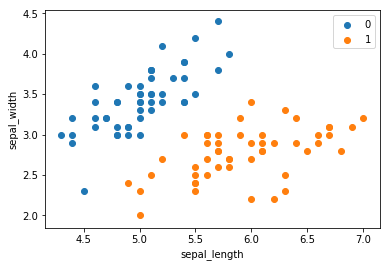

In [4]:
# 画出原始散点图
plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label='0')
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [5]:
# 将DF转为ndarray
data = df.iloc[:100, [0, 1, -1]]
X = data.iloc[:, [0, 1]].values
y = data.iloc[:, -1].values
y = np.array([1 if i == 1 else -1 for i in y])

In [6]:
# 感知机模型
class PerceptronClassifier(object):
    def __init__(self):
        self.w = 0
        self.b = 0
        self.learning_rate = 0.1
        self.fitted = False

    def cal_y(self, x, w, b):
        y = np.dot(w, x) + b
        return y

    # 利用随机梯度下降法迭代
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1], dtype=np.float32)
        all_fit = False
        while not all_fit:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.cal_y(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * y * X
                    self.b = self.b + self.learning_rate * y
                    wrong_count += 1
            if wrong_count == 0:  # 当没有误分类的点时，则拟合完成
                all_fit = True
                self.fitted = True
        print('Perceptron Model Fit Success!')

    def predict(self, X):
        if not self.fitted:
            raise ValueError('This PerceptronClassifier instance is not fitted yet')
        y_pred = self.cal_y(X, self.w, self.b)
        return np.where(y_pred >= 0, 1, -1)

In [7]:
# 创建示例并拟合训练集
perceptron = PerceptronClassifier()
perceptron.fit(X, y)

Perceptron Model Fit Success!


**直线的y_值推导：**  
超平面$w_1x_1 + w_2x_2 + b =0 \Rightarrow x_2 = \frac{-(w_1x_1 + b)}{w_2}$

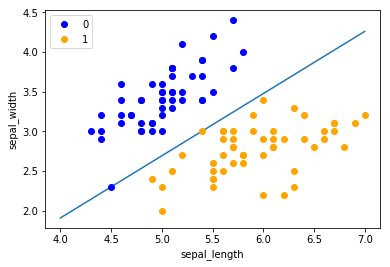

In [8]:
# 画出分界线
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

# format_string由颜色、线段风格、标记组成，详见https://blog.csdn.net/u014539580/article/details/78207537
plt.plot(data.iloc[:50, 0], data.iloc[:50, 1], 'o', color='blue', label='0')
plt.plot(data.iloc[50:100, 0], data.iloc[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()